# Blazed gratings
In this example we show that blazed grating generates order 1, only when the angle of the grating is the correct one (maximum phase shift = 2$\pi$). On the other hand, for other grating angle, several diffraction orders are generated.

In [17]:
from diffractio import np, plt
from diffractio import um, mm, degrees

from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XY import Scalar_mask_XY

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_fields_X import Scalar_field_X

## Grating in x mode

**Grating with correct phase**

In [18]:
wavelength = 1*um
focal = 5*mm

x = np.linspace(-3500,3500,2048*8)


In [19]:
t_lens_x = Scalar_mask_X(x, wavelength)
t_lens_x.lens(x0=0, focal=focal, radius=0)

In [20]:
t_blazed_x = Scalar_mask_X(x, wavelength)
t_blazed_x.blazed_grating(x0=125, period=10, phase_max=2 * np.pi)

Good result: factor 2.04


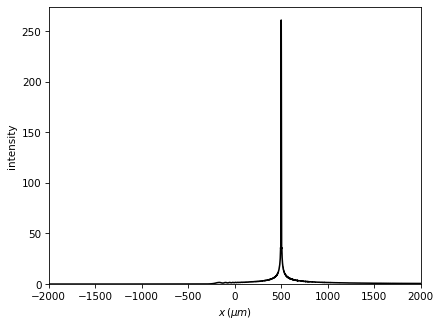

In [21]:
u1 = t_lens_x * t_blazed_x
u2 = u1.RS(z=focal)
u2.draw()
plt.xlim(-2000, 2000)

**Grating with wrong phase**

In [22]:
t_blazed2_x = Scalar_mask_X(x, wavelength)
t_blazed2_x.blazed_grating(x0=125, period=10, phase_max=1.5 * np.pi)

Good result: factor 2.04


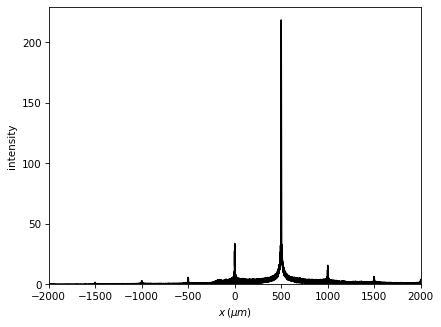

In [23]:
u1_x = t_lens_x * t_blazed2_x
u2_x = u1_x.RS(z=focal)
u2_x.draw()
plt.xlim(-2000, 2000)

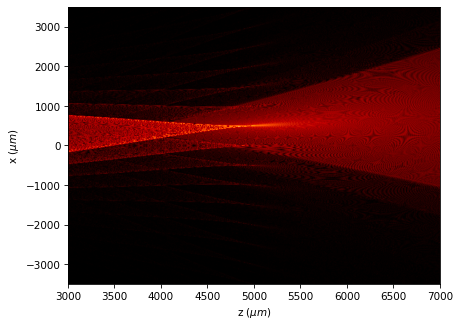

In [24]:
tx=Scalar_field_X(x=x, wavelength=wavelength)
tx.incident_field(u1_x)
xout = np.linspace(-3500,3500,512)
z = np.linspace(focal - 2*mm, focal + 2*mm, 512)
txz=tx.CZT(xout=xout, z=z)
txz.draw(logarithm=5)

## Grating in XY mode

**Grating with correct phase**

In [32]:
num_pixels = 1024

length = 500*um
x0 = np.linspace(-length/2, length/2, 2*num_pixels)
y0 = np.linspace(-length/2, length/2, num_pixels)
wavelength = 0.6238*um

focal = 5*mm


In [33]:
u0_xy = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0_xy.plane_wave(A=1)
u0_xy.pupil()

In [34]:
t_lens_xy = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t_lens_xy.lens(r0=(0*um, 0*um), focal=focal)

In [35]:
t_blazed_xy = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t_blazed_xy.blazed_grating(period=20*um, phase_max=2 * np.pi, x0=0*um, angle=0*degrees)


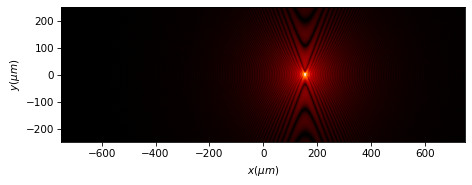

In [38]:
u1_xy = u0_xy * t_lens_xy * t_blazed_xy

u2_xy = u1_xy.RS(z=focal, new_field=True, amplification=(3, 1))

u2_xy.draw(logarithm=1e3)

**Grating with wrong phase**

In [40]:
t_blazed2_xy = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t_blazed2_xy.blazed_grating(period=20*um, phase_max=1.5 * np.pi, x0=0*um, angle=0*degrees)

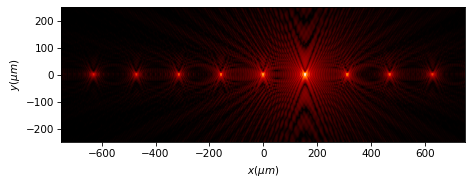

In [41]:
u1_xy = u0_xy * t_lens_xy * t_blazed2_xy
u2_xy = u1_xy.RS(z=focal, new_field=True, amplification=(3, 1))
u2_xy.draw(logarithm=1e3)